In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Beginning Questions:**
1. Does having higher grades lead to depression?
2. Does family history lead determine childs mental health?
3. Does Diet affect mental health?
4. Which factors contribute the most to Student Depression?

In [2]:
# Get dataset
df = pd.read_csv("data/Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Basic Exploring
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

We will just drop null rows due to such little amount

In [4]:
df.dropna(inplace=True)

In [5]:
# Drop outliers 
# Put the ids of students with 0 CGPA in list
ids_to_drop = df[df['CGPA'] <= 0]['id'].tolist()
# Drop
df = df[~df['id'].isin(ids_to_drop)]

#### 1. Does having higher grades lead to depression?

<Axes: xlabel='CGPA', ylabel='Count'>

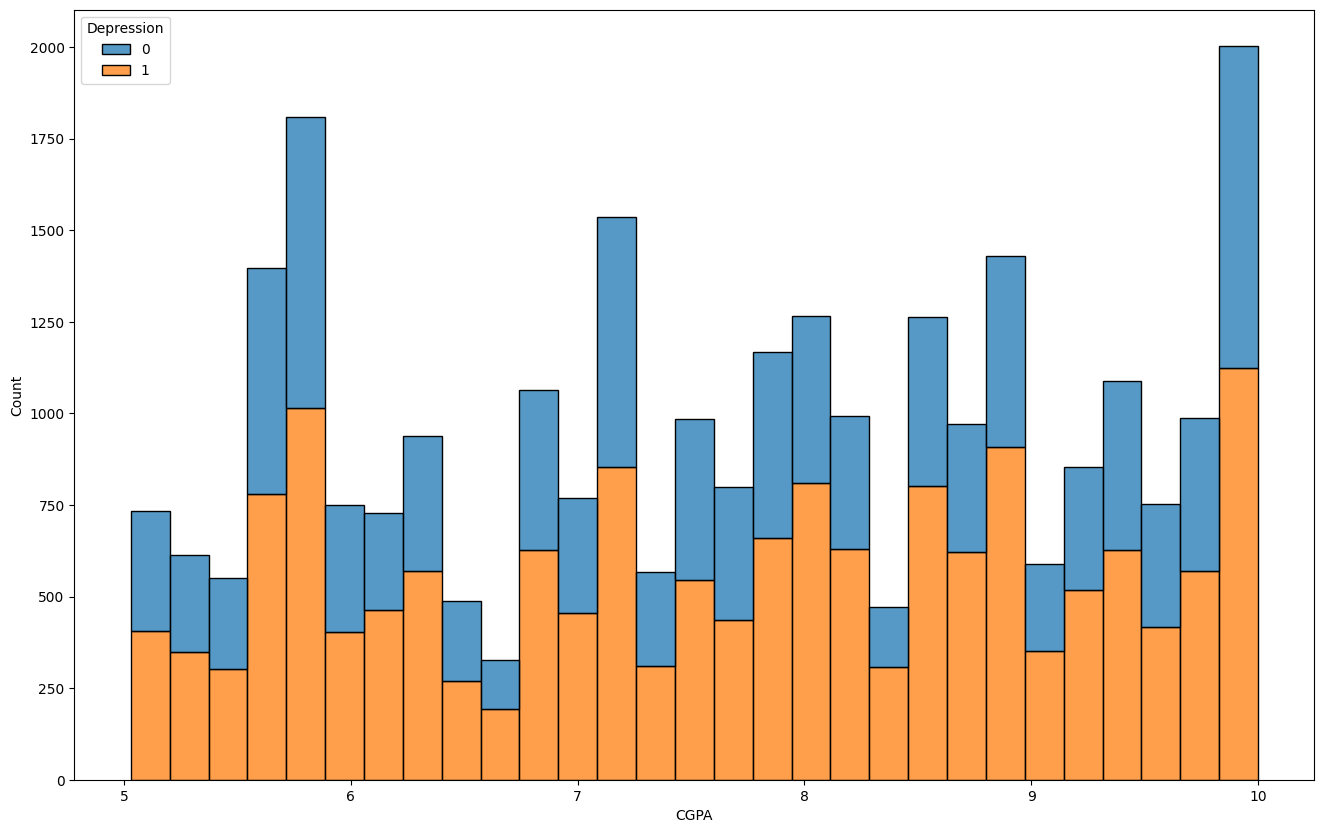

In [15]:
# Histogram
plt.figure(figsize=(16,10))
sns.histplot(data=df, x='CGPA', hue='Depression', multiple='stack')

In [14]:
# To try and find a clear answer, "group" the gpas together by rounding then look at the precentage of depressed students in each group

df['CGPA_rounded'] = df['CGPA'].apply(round)

# For each gpa group
for group in sorted(df['CGPA_rounded'].unique()):
    # Get total number of students in group
    total = len(df[df['CGPA_rounded'] == group])
    # Get number of students in group that are depressed
    dep_total = len(df[(df['CGPA_rounded'] == group) & (df['Depression'] == 1)])
    # Get precentage
    print(f"In CGPA Group {group}, {round((dep_total / total) * 100, 2)}% of students are depressed")

In CGPA Group 5, 55.84% of students are depressed
In CGPA Group 6, 57.26% of students are depressed
In CGPA Group 7, 57.01% of students are depressed
In CGPA Group 8, 60.09% of students are depressed
In CGPA Group 9, 61.83% of students are depressed
In CGPA Group 10, 56.43% of students are depressed


From groups 5-9 there is an upword trend in depressed students, but with group 10 students are less depressed.

#### 2. Does family history lead determine childs mental health?

In [22]:
# Turn into int column instead of string
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)